# 7 PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Cargar los datos.

In [2]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,1200,500,504,amc,aspen,audi,benz,brougham,buick,caprice,...,any_modelo_82,origen_1,origen_2,origen_3,cilindros_oe_mms,desplazamiento_yeo_mms,caballos_yeo_mms,peso_yeo_mms,aceleracion_yeo_mms,mpg
0,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.893854,0.869861,0.755175,0.248895,15.0
1,0,0,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.832943,0.826943,0.697145,0.281928,16.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.976988,0.944816,0.878469,0.146330,15.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.999148,0.984192,0.880684,0.074690,14.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.986944,0.975833,0.873496,0.037754,14.0


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [3]:
target = 'mpg'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [4]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


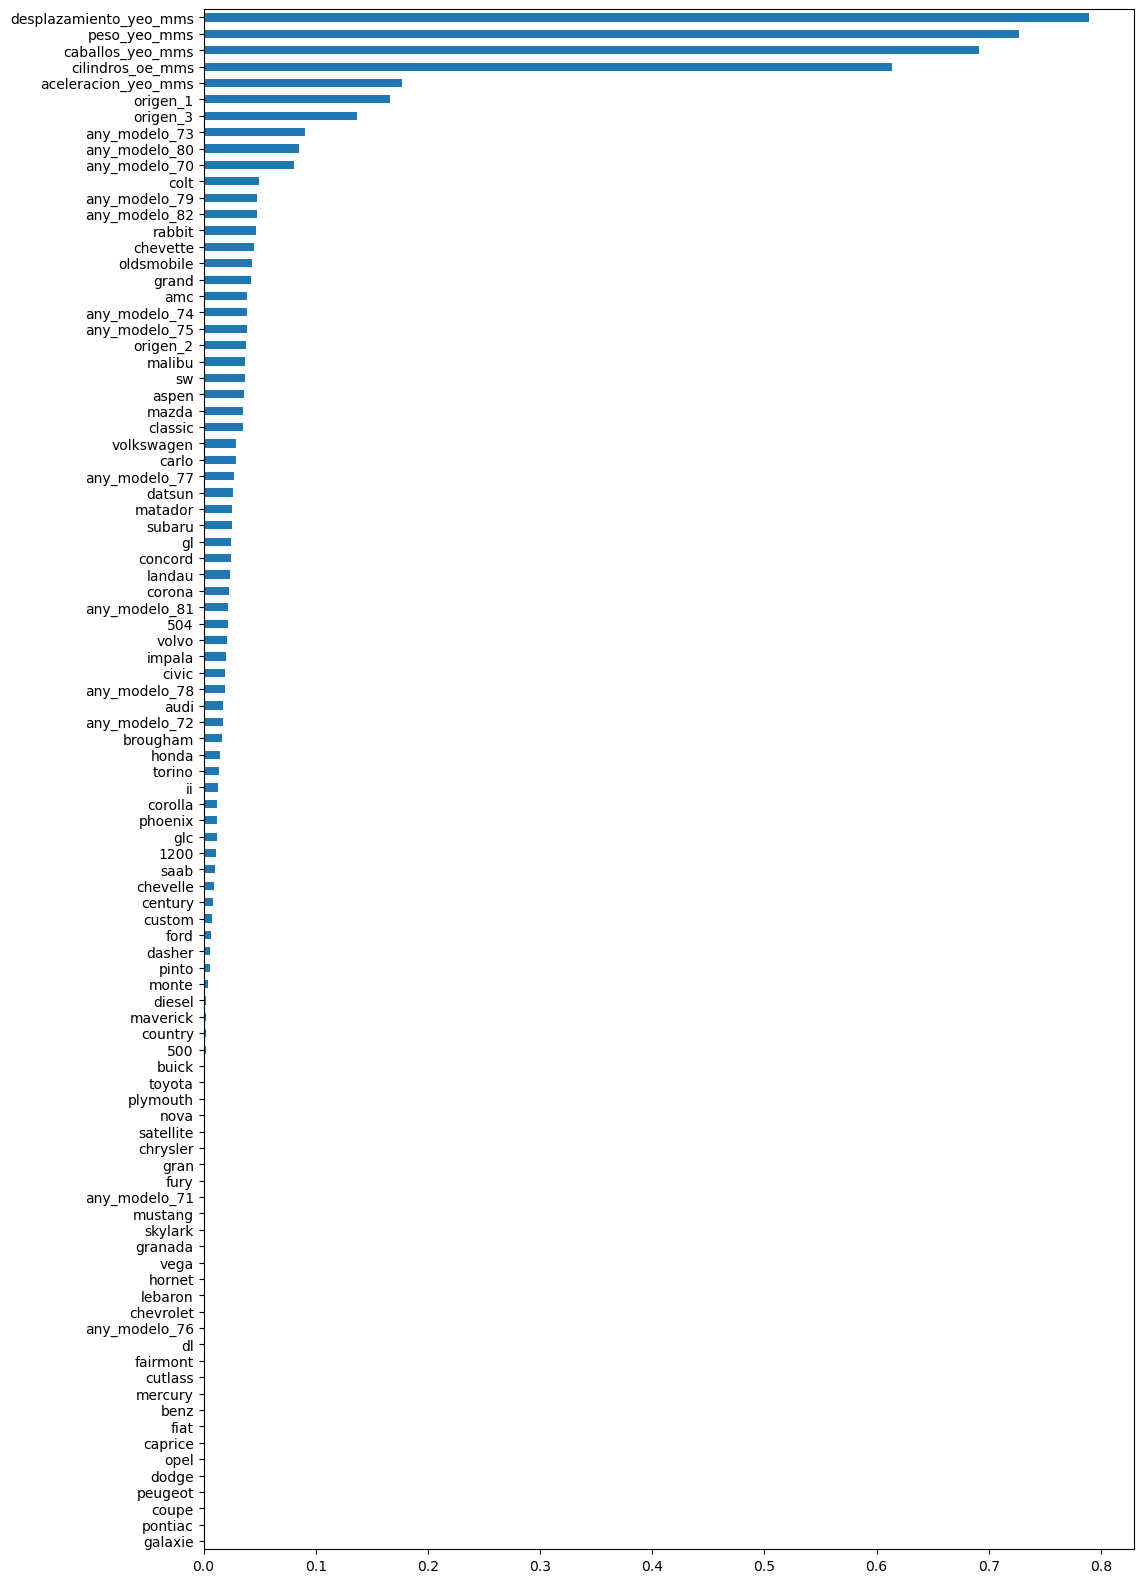

In [5]:
mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [6]:
rank_mi = ranking_mi(mutual_selector, modo = 'tabla')
rank_mi.head(40)

,variable,importancia_mi,ranking_mi
90,desplazamiento_yeo_mms,0.789678,0
92,peso_yeo_mms,0.727355,1
91,caballos_yeo_mms,0.691658,2
89,cilindros_oe_mms,0.614135,3
93,aceleracion_yeo_mms,0.177004,4
86,origen_1,0.166317,5
88,origen_3,0.136406,6
76,any_modelo_73,0.090503,7
83,any_modelo_80,0.085425,8
73,any_modelo_70,0.080546,9


#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [7]:
posicion_variable_limite = 40

##### Extraer los nombres de las que entran

In [8]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [9]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [10]:
rfe = RFE(estimator = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae'))

#### Entrenar

In [11]:
rfe.fit(x,y)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric='mae',
                           feature_types=None, gamma=None, gpu_id=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=-1, num_parallel_tree=None, predictor=None,
                           random_state=None, ...))

##### Extraer los nombres de las que entran

In [12]:
entran_rfe = x.columns[rfe.support_]

In [13]:
len(entran_rfe)

47

#### Crear el dataframe con la selección

In [14]:
x_rfe = x[entran_rfe].copy()

In [15]:
x_rfe.columns

Index(['aspen', 'audi', 'chevette', 'corolla', 'coupe', 'cutlass', 'dasher',
       'datsun', 'diesel', 'dl', 'fiat', 'ford', 'glc', 'grand', 'honda', 'ii',
       'mazda', 'mercury', 'mustang', 'nova', 'peugeot', 'phoenix', 'pinto',
       'pontiac', 'subaru', 'sw', 'volkswagen', 'volvo', 'any_modelo_70',
       'any_modelo_72', 'any_modelo_73', 'any_modelo_74', 'any_modelo_75',
       'any_modelo_76', 'any_modelo_77', 'any_modelo_78', 'any_modelo_79',
       'any_modelo_80', 'any_modelo_81', 'any_modelo_82', 'origen_1',
       'origen_2', 'cilindros_oe_mms', 'desplazamiento_yeo_mms',
       'caballos_yeo_mms', 'peso_yeo_mms', 'aceleracion_yeo_mms'],
      dtype='object')

### Permutation Importance

#### Crear una función para mostrar el resultado

In [16]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [17]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'neg_mean_absolute_percentage_error',
                                     n_repeats=5, n_jobs = -1)

#### Revisar la salida

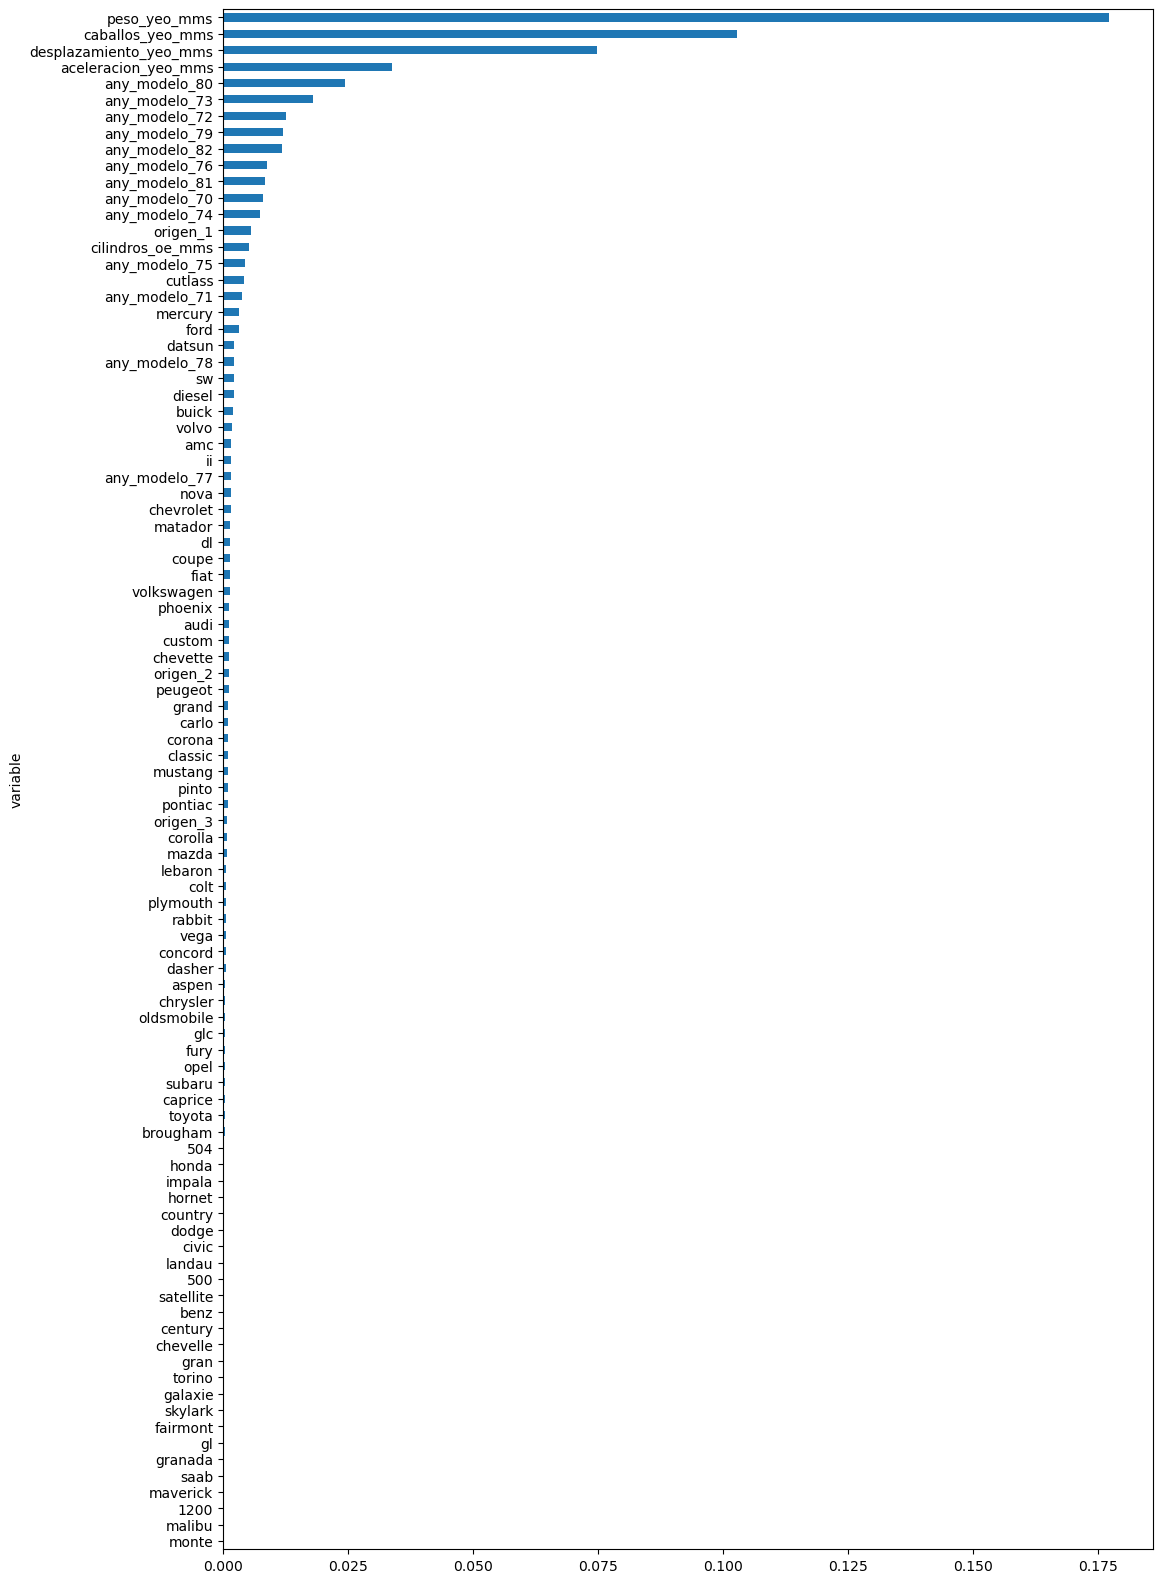

In [18]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

In [19]:
rank_per.head(25)

,variable,importancia_per,ranking_per
92,peso_yeo_mms,0.177164,0
91,caballos_yeo_mms,0.102798,1
90,desplazamiento_yeo_mms,0.074877,2
93,aceleracion_yeo_mms,0.033797,3
83,any_modelo_80,0.024425,4
76,any_modelo_73,0.018009,5
75,any_modelo_72,0.012622,6
82,any_modelo_79,0.011930,7
85,any_modelo_82,0.011699,8
79,any_modelo_76,0.008745,9


#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [20]:
posicion_variable_limite = 25

##### Extraer los nombres de las que entran

In [21]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [22]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [23]:
x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
# x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

## STATSMODELS

In [24]:
import statsmodels.api as sm

# Agregar una constante al conjunto de datos para el término de sesgo (intercepto) del modelo
X = sm.add_constant(x)

# Ajustar el modelo de regresión logística utilizando statsmodels
model = sm.OLS(y, X)
result = model.fit()

# Ver un resumen del modelo para obtener estadísticas y coeficientes
print(result.summary())

# Para ver la importancia de las variables, puedes examinar los valores de p (p-values) en el resumen del modelo.
# Cuanto menor sea el valor de p, más significativa es la variable en la predicción del resultado.
# Por ejemplo, si el valor de p es menor que un umbral (por ejemplo, 0.05), la variable se considera significativa.

# También puedes calcular las odds ratios para evaluar el impacto relativo de las variables en las probabilidades
# de la clase positiva (o el evento que estás prediciendo).

# Calcular odds ratios y sus intervalos de confianza del 95%
odds_ratios = np.exp(result.params)
conf_intervals = np.exp(result.conf_int())

# Crear un DataFrame para mostrar los resultados
results_summary = pd.DataFrame({'Odds Ratio': odds_ratios, 'Confidence Interval': conf_intervals[0], 'p-value': result.pvalues})

# Filtrar las variables significativas (por ejemplo, aquellas con p < 0.05)
significant_results = results_summary[results_summary['p-value'] < 0.05]

# Mostrar los resultados para las variables significativas
print("\nVariables Significativas:")
print(significant_results)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     27.18
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.17e-73
Time:                        16:52:10   Log-Likelihood:                -595.73
No. Observations:                 279   AIC:                             1375.
Df Residuals:                     187   BIC:                             1710.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     28

### Correlación

#### Crear una función para mostrar el resultado

In [25]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [26]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [27]:
cor_finales.var1.value_counts()

desplazamiento_yeo_mms    5
peso_yeo_mms              4
origen_3                  4
aceleracion_yeo_mms       3
volkswagen                3
origen_2                  3
caballos_yeo_mms          2
origen_1                  2
datsun                    2
amc                       2
cilindros_oe_mms          1
landau                    1
malibu                    1
rabbit                    1
Name: var1, dtype: int64

##### Revisar detalle

In [28]:
cor_finales.head(50)

,var1,var2,corr
1,desplazamiento_yeo_mms,peso_yeo_mms,0.948003
3,desplazamiento_yeo_mms,cilindros_oe_mms,0.938319
43,peso_yeo_mms,cilindros_oe_mms,0.874677
42,peso_yeo_mms,caballos_yeo_mms,0.869894
2,desplazamiento_yeo_mms,caballos_yeo_mms,0.860617
83,caballos_yeo_mms,cilindros_oe_mms,0.812373
5,desplazamiento_yeo_mms,origen_1,0.700208
162,aceleracion_yeo_mms,caballos_yeo_mms,0.669111
220,origen_1,origen_2,0.637926
125,cilindros_oe_mms,origen_1,0.609528


#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

In [29]:
a_eliminar_corr = ['desplazamiento_yeo_mms', 'cilindros_oe_mms','origen_3']

In [30]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [31]:
x_preseleccionado.columns.to_list()

['peso_yeo_mms',
 'caballos_yeo_mms',
 'aceleracion_yeo_mms',
 'origen_1',
 'any_modelo_73',
 'any_modelo_80',
 'any_modelo_70',
 'colt',
 'any_modelo_79',
 'any_modelo_82',
 'rabbit',
 'chevette',
 'oldsmobile',
 'grand',
 'amc',
 'any_modelo_74',
 'any_modelo_75',
 'origen_2',
 'malibu',
 'sw',
 'aspen',
 'mazda',
 'classic',
 'volkswagen',
 'carlo',
 'any_modelo_77',
 'datsun',
 'matador',
 'subaru',
 'gl',
 'concord',
 'landau',
 'corona',
 'any_modelo_81',
 '504',
 'volvo',
 'impala']

### UNIFICAMOS X_PRESELECCIONADO Y TARGET

In [32]:
df_final = pd.concat([x_preseleccionado,y],axis= 1)

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [33]:
#Guardar los archivos
df_final.to_pickle('../../02_Datos/03_Trabajo/df_final.pickle')  